A new ARIMA model

Instructions

Now that you have built an ARIMA model, build a new one with fresh data (try one of these datasets from Duke. Annotate your work in a notebook, visualize the data and your model, and test its accuracy using MAPE.

In [6]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from common.utils import load_data, mape
from IPython.display import Image 

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [17]:
data = pd.read_csv('../Data/NFLX.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.00,267.90,250.03,254.26,254.26,11896100
1,2/6/2018,247.70,266.70,245.00,265.72,265.72,12595800
2,2/7/2018,266.58,272.45,264.33,264.56,264.56,8981500
3,2/8/2018,267.08,267.62,250.00,250.10,250.10,9306700
4,2/9/2018,253.85,255.80,236.11,249.47,249.47,16906900
5,2/12/2018,252.14,259.15,249.00,257.95,257.95,8534900
6,2/13/2018,257.29,261.41,254.70,258.27,258.27,6855200
7,2/14/2018,260.47,269.88,260.33,266.00,266.00,10972000
8,2/15/2018,270.03,280.50,267.63,280.27,280.27,10759700
9,2/16/2018,278.73,281.96,275.69,278.52,278.52,8312400


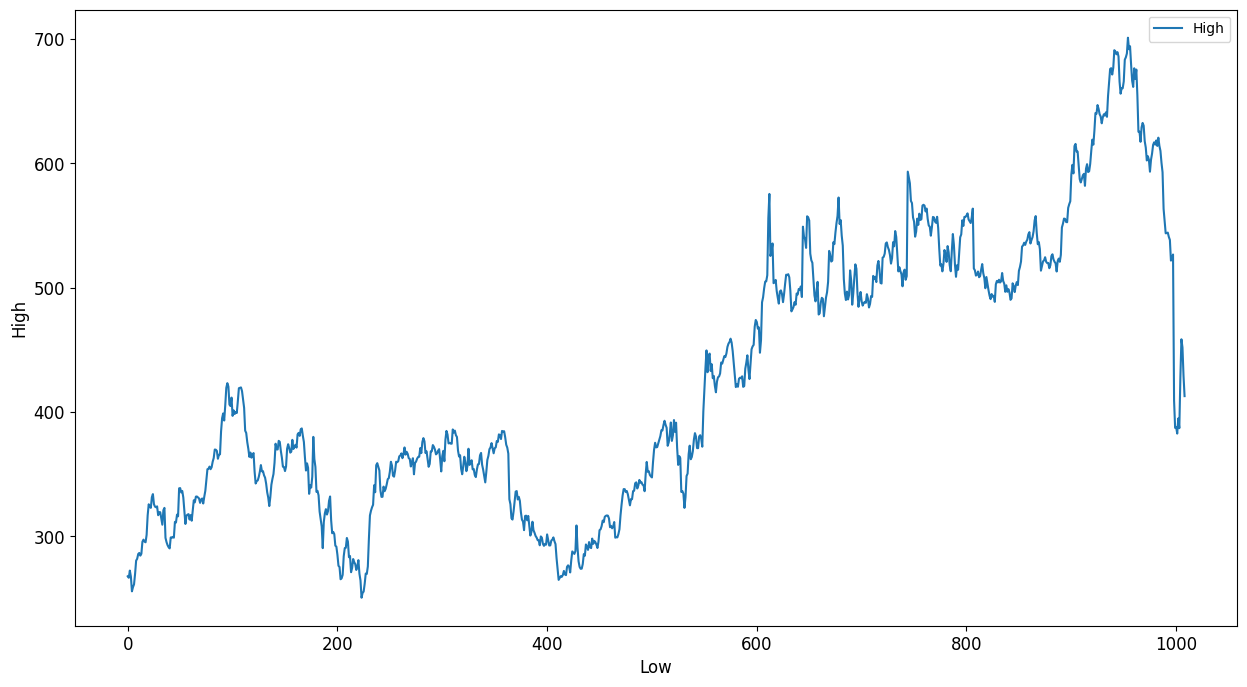

In [18]:
import matplotlib.pyplot as plt
data.plot(y='High', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('Low', fontsize=12)
plt.ylabel('High', fontsize=12)
plt.show()

In [13]:
train_start_dt = '2018-05-02 00:00:00'
test_start_dt = '2018-05-30 00:00:00'

In [23]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


In [21]:
# Specify the number of steps to forecast ahead
HORIZON = 3
print('Forecasting horizon:', HORIZON, 'hours')

Forecasting horizon: 3 hours


In [26]:
order = (4, 1, 0)  # Adjust the order of ARIMA model as per your requirements
model = SARIMAX(endog=train_data, order=order)
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [27]:
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the ARIMA model
order = (4, 1, 0)  # Adjust the order of ARIMA model as per your requirements
model = SARIMAX(endog=train_data, order=order)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visualize the predictions
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).